In [1]:
import pandas as pd
%load_ext rpy2.ipython

Image of quant gel.

![](data/2021-12-08_17h47m30s-growth-condition-comparison-RNA-smear-cut-copy-quant.png)

In [2]:
lane_quant = pd.read_csv(
    'data/2021-12-08_17h47m30s-growth-condition-comparison-RNA-smear-cut-copy.csv',
    skiprows=1)
samples = pd.read_csv('data/DH10B-midi-prep-growth-condition-optimization.tsv', sep='\t')

In [3]:
samples

Sample number  Flask volume (L)  % glucose  culture volume  \
0               1               1.0        0.0             250   
1               2               1.0        0.2             250   
2               3               1.0        0.0             500   
3               4               1.0        0.2             500   
4               5               1.0        0.0             150   
5               6               1.0        0.2             150   
6               7               1.0        0.0             150   
7               8               1.0        0.0             500   
8               9               1.0        0.2             150   
9              10               0.5        0.0             250   
10             11               0.5        0.2             250   
11             12               4.0        0.2             350   
12             13               4.0        0.0             350   

    temperature (C)  Glucose Volume  Air Volume  
0                30             0.0         750  
1                30             0.5         750  
2                30             0.0         500  
3                30             1.0         500  
4                30             0.0         850  
5                30             0.3         850  
6                37             0.0         850  
7                37             0.0         500  
8                37             0.3         850  
9                37             0.0         250  
10               37             0.5         250  
11               37             0.7        3650  
12               37             0.0        3650

In [4]:
lane_quant

Lane  Band No.  Band Label  Mol. Wt. (KDa)  Relative Front  \
0       1         1         NaN             NaN        0.018927   
1       1         2         NaN             NaN        0.126183   
2       1         3         NaN             NaN        0.375394   
3       1         4         NaN             NaN        0.605678   
4       1         5         NaN             NaN        0.694006   
..    ...       ...         ...             ...             ...   
98     13         3         NaN             NaN        0.381703   
99     13         4         NaN             NaN        0.511041   
100    13         5         NaN             NaN        0.599369   
101    13         6         NaN             NaN        0.690852   
102    13         7         NaN             NaN        0.949527   

     Adj. Volume (Int)  Volume (Int)  Abs. Quant.  Rel. Quant.     Band %  \
0                 7728        291024          NaN          NaN   0.385435   
1                33360        307488          NaN          NaN   1.663834   
2                18576        334992          NaN          NaN   0.926480   
3               254784        585552          NaN          NaN  12.707381   
4              1488672       2109120          NaN          NaN  74.247684   
..                 ...           ...          ...          ...        ...   
98               32304        376176          NaN          NaN   0.923296   
99               64272        535584          NaN          NaN   1.836989   
100             674304       1152384          NaN          NaN  19.272613   
101            2461008       3218640          NaN          NaN  70.339274   
102             246048        485616          NaN          NaN   7.032418   

        Lane %  
0     0.370703  
1     1.600239  
2     0.891069  
3    12.221685  
4    71.409822  
..         ...  
98    0.906947  
99    1.804461  
100  18.931339  
101  69.093727  
102   6.907890  

[103 rows x 11 columns]

Sample number is the same as lane number so merge on those fields to add sample conditions to quantifications.

In [5]:
data = lane_quant.merge(samples, left_on='Lane', right_on='Sample number')
data

Lane  Band No.  Band Label  Mol. Wt. (KDa)  Relative Front  \
0       1         1         NaN             NaN        0.018927   
1       1         2         NaN             NaN        0.126183   
2       1         3         NaN             NaN        0.375394   
3       1         4         NaN             NaN        0.605678   
4       1         5         NaN             NaN        0.694006   
..    ...       ...         ...             ...             ...   
98     13         3         NaN             NaN        0.381703   
99     13         4         NaN             NaN        0.511041   
100    13         5         NaN             NaN        0.599369   
101    13         6         NaN             NaN        0.690852   
102    13         7         NaN             NaN        0.949527   

     Adj. Volume (Int)  Volume (Int)  Abs. Quant.  Rel. Quant.     Band %  \
0                 7728        291024          NaN          NaN   0.385435   
1                33360        307488          NaN          NaN   1.663834   
2                18576        334992          NaN          NaN   0.926480   
3               254784        585552          NaN          NaN  12.707381   
4              1488672       2109120          NaN          NaN  74.247684   
..                 ...           ...          ...          ...        ...   
98               32304        376176          NaN          NaN   0.923296   
99               64272        535584          NaN          NaN   1.836989   
100             674304       1152384          NaN          NaN  19.272613   
101            2461008       3218640          NaN          NaN  70.339274   
102             246048        485616          NaN          NaN   7.032418   

        Lane %  Sample number  Flask volume (L)  % glucose  culture volume  \
0     0.370703              1               1.0        0.0             250   
1     1.600239              1               1.0        0.0             250   
2     0.891069              1               1.0        0.0             250   
3    12.221685              1               1.0        0.0             250   
4    71.409822              1               1.0        0.0             250   
..         ...            ...               ...        ...             ...   
98    0.906947             13               4.0        0.0             350   
99    1.804461             13               4.0        0.0             350   
100  18.931339             13               4.0        0.0             350   
101  69.093727             13               4.0        0.0             350   
102   6.907890             13               4.0        0.0             350   

     temperature (C)  Glucose Volume  Air Volume  
0                 30             0.0         750  
1                 30             0.0         750  
2                 30             0.0         750  
3                 30             0.0         750  
4                 30             0.0         750  
..               ...             ...         ...  
98                37             0.0        3650  
99                37             0.0        3650  
100               37             0.0        3650  
101               37             0.0        3650  
102               37             0.0        3650  

[103 rows x 18 columns]

Get the last two bands of each lane.

In [6]:
def get_last_two_bands_each_lane(df):
    lane_dfs = []
    number_lanes = df['Lane'].max()
    for i in range(1, number_lanes+1):
        lane_data = df.loc[df['Lane'] == i]
        max_band_number = lane_data['Band No.'].max()
        lane_data = lane_data.loc[lane_data['Band No.'].isin([max_band_number-1, max_band_number-2])]
        lane_data['Band No.'] = abs(lane_data['Band No.'] - max_band_number)
        supercoiled = lane_data.loc[lane_data['Band No.'] == 1]['Band %'].values[0]
        duplex = lane_data.loc[lane_data['Band No.'] == 2]['Band %'].values[0]
        lane_data['rel.band.percent'] = supercoiled / duplex
        lane_dfs.append(lane_data)
    
    df_concat = pd.concat(lane_dfs)
    df_by_lane = df_concat[['Lane', 'Flask volume (L)', '% glucose', 'culture volume', 'temperature (C)', 'rel.band.percent']]
    return df_by_lane.drop_duplicates()
        

signal = get_last_two_bands_each_lane(data)
signal

Lane  Flask volume (L)  % glucose  culture volume  temperature (C)  \
3       1               1.0        0.0             250               30   
10      2               1.0        0.2             250               30   
17      3               1.0        0.0             500               30   
24      4               1.0        0.2             500               30   
33      5               1.0        0.0             150               30   
44      6               1.0        0.2             150               30   
54      7               1.0        0.0             150               37   
62      8               1.0        0.0             500               37   
70      9               1.0        0.2             150               37   
79     10               0.5        0.0             250               37   
87     11               0.5        0.2             250               37   
93     12               4.0        0.2             350               37   
100    13               4.0        0.0             350               37   

     rel.band.percent  
3            5.842879  
10           8.500914  
17           1.534107  
24           5.345899  
33          13.779327  
44           8.932584  
54           9.129527  
62           1.791634  
70           6.486468  
79           6.848048  
87           6.065368  
93           0.193021  
100          3.649701

In [31]:
print(signal.to_markdown(index=False))

|   Lane |   Flask volume (L) |   % glucose |   culture volume |   temperature (C) |   rel.band.percent |
|-------:|-------------------:|------------:|-----------------:|------------------:|-------------------:|
|      1 |                1   |         0   |              250 |                30 |           5.84288  |
|      2 |                1   |         0.2 |              250 |                30 |           8.50091  |
|      3 |                1   |         0   |              500 |                30 |           1.53411  |
|      4 |                1   |         0.2 |              500 |                30 |           5.3459   |
|      5 |                1   |         0   |              150 |                30 |          13.7793   |
|      6 |                1   |         0.2 |              150 |                30 |           8.93258  |
|      7 |                1   |         0   |              150 |                37 |           9.12953  |
|      8 |                1   |         0   | 

## Sample comparisons across conditions

### 150 ml volume

When grown at 30C without glucose saw best supercoiled ratio. But unlike other superoiled samples glucose decreased supercoiled ratio. Glucose also decreased supercoiling ratio when grown at 37C.


### 250 ml volume

#### Glucose

When grown at 30C glucose increased the relative supercoiled percentage. 


### 500 ml volume 

#### Glucose

When grown at 30C glucose also increased relative supercoiled percentage. Similar increase was also seen when glucose added in the same volume of culture but grown at 37C.

#### Temperature

At 500ml no glucose increasing temperature to 37 slightly increased ratio but basically no effect.

### 4 L volume

#### Glucose

Glucose greatly decreased supercoiled ratio

In [14]:
%%R

library(ggplot2)
library(ggpubr)
library(dplyr)
library(RColorBrewer)

Clean up column names

In [8]:
%%R -i signal
colnames(signal)

[1] "Lane"             "Flask volume (L)" "% glucose"        "culture volume"  
[5] "temperature (C)"  "rel.band.percent"


In [9]:
%%R -i signal

c.names <- colnames(signal)
c.names[2] <- 'Flask.volume'
c.names[3] <- 'Percent.glucose'
c.names[4] <- 'Culture.volume'
c.names[5] <- 'Temp'

colnames(signal) <- c.names
signal.rename <- signal

In [10]:
%%R

signal.rename$Culture.volume / (signal.rename$Flask.volume * 1000)

 [1] 0.2500 0.2500 0.5000 0.5000 0.1500 0.1500 0.1500 0.5000 0.1500 0.5000
[11] 0.5000 0.0875 0.0875


R[write to console]: Saving 6.67 x 6.67 in image



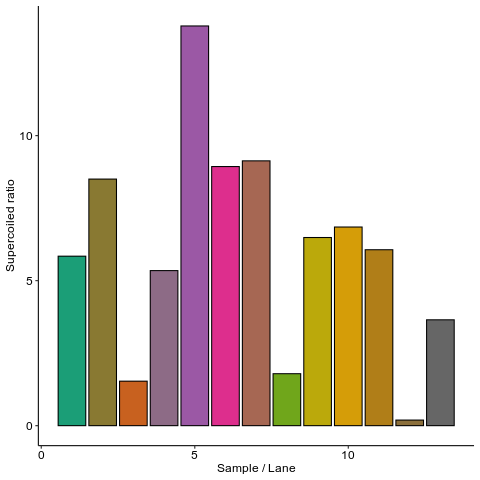

In [29]:
%%R

colors <- nrow(unique(signal.rename))
p = colorRampPalette(brewer.pal(9, "Dark2"))(colors)
all.plot <- ggplot(
    signal.rename, 
    aes(x=Lane, y=rel.band.percent, fill=as.factor(Lane))
) +  geom_bar(color='black', stat='identity', position='dodge') + 
theme_pubr() + scale_fill_manual(values=p) + labs(x='Sample / Lane', y='Supercoiled ratio') + theme(legend.position='none')

ggsave('midi-prep-growth-conditions-test.png', all.plot)
all.plot

Overall lane 5 had best supercoiled ratio. This was a 1 L flask with total volume 150 ml of culture and no glucose.

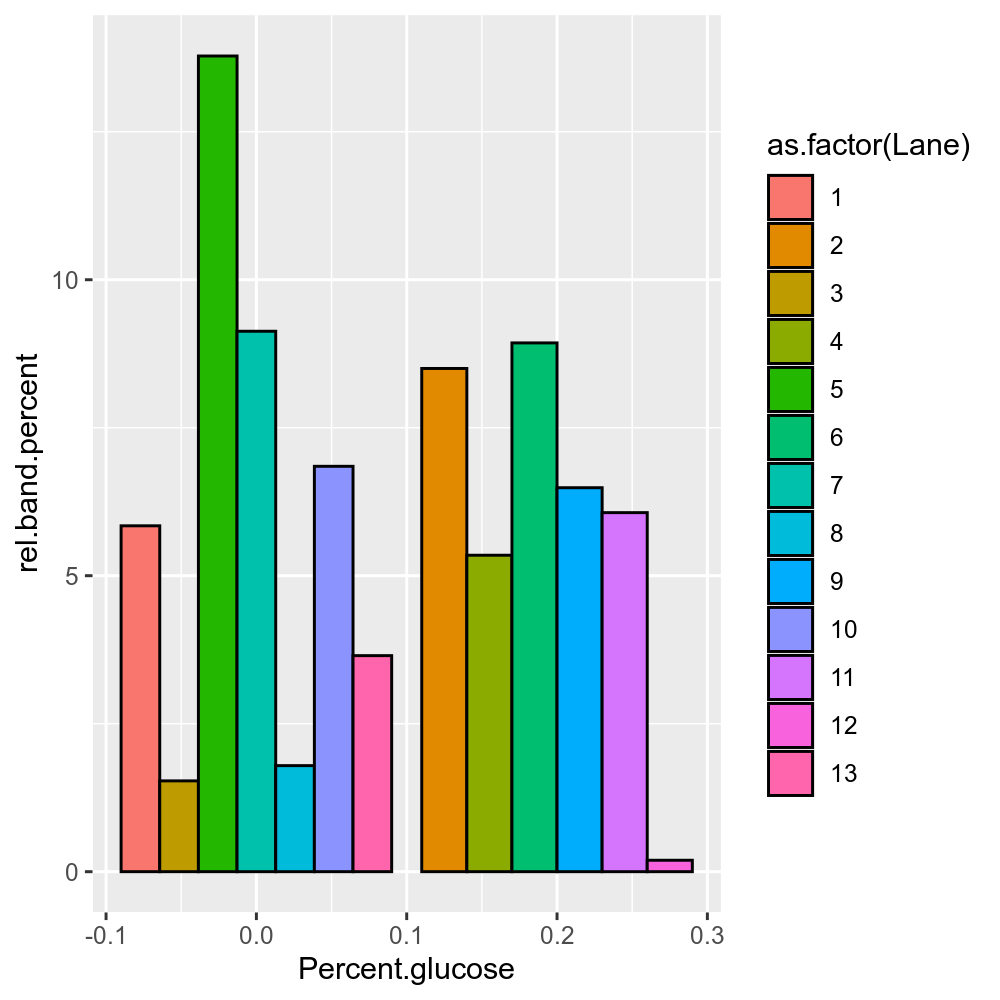

In [12]:
%%R -w 5 -h 5 --units in -r 200

air <- ggplot(signal.rename, aes(x=Culture.volume / (Flask.volume*1000), y=rel.band.percent, color=as.factor(Lane))) + geom_point()
glucose <- ggplot(signal.rename, aes(x=Percent.glucose, y=rel.band.percent, fill=as.factor(Lane))) + geom_bar(color='black', stat='identity', position='dodge')
temp <- ggplot(signal.rename, aes(x=as.factor(Temp), y=rel.band.percent, fill=as.factor(Lane))) + geom_bar(color='black', stat='identity', position='dodge')
glucose

In [37]:
def get_ideal_points(min_dist, max_dist, number_targets):
    assert max_dist > min_dist
    usable_length = max_dist - min_dist
    step = int(usable_length / number_targets)
    ideal_points = []
    for i in range(min_dist, max_dist, step):
        print(i)

get_ideal_points(10, 1000, 5)

10
208
406
604
802
